# AI演習 第8回
### ディープラーニングによる自然言語処理 (2)

## 実行環境の確認
[実行環境]<br>
Colaboratoryの実行環境は更新されるので確認しておきます。<br>
Python: 3.10.2<br>
TensorFlow: 2.14.0<br>

(参考: 2022年度)<br>
Python: 3.7.15<br>
TensorFlow: 2.9.2<br>
Keras: 2.9.0

ランタイムのタイプは、GPUを指定するように注意してください。

In [ ]:
import tensorflow as tf

print(tf.__version__)
# print(tf.keras.__version__)

2.14.0


In [ ]:
!python --version

Python 3.10.12


## データセット

コンピュータ・アルゴリズムの評価などの目的で収集された（通常、大規模な）データの集合をデータセットと呼びます。機械学習のためのデータセットには，「データ」自体と「正解データ」が用意されています。ここで，正解データとは教師付き学習を行うための「正解」を表すデータです。
自然言語処理のためのデータセットとして、IMDBデータセットやReutersデータセットがあります。

### IMDbデータセット
* IMDbデータセット(`http://ai.stanford.edu/~amaas/data/sentiment/`)は、映画のレビューを50,000個集めたもので、好意的(positive)な評価25,000個と否定的(negarive)な評価25,000からなります。ここで、映画のレビューは文章データです。各文章データに、好意的(positive)な評価および否定的(negarive)な評価が正解データとして付与されています。

### Reutersニュースのデータセット
* 1万1228件のReutersニュース記事が、46個のトピックに分類されています。ニュース記事は文章データです。各文章データに、文章のトピックが正解データとして付与されています。

### データセットの確認

kerasには、IMDbデータセットとReutersニュースデータセットが付属しています。それぞれのデータセットの内容を確認してみましょう。

* ここでは、kerasに付属するデータを利用します。訓練用データ(x_train, y_train)が25,000個、テスト用データ(x_test, y_test)が25,000個です。また、y_train (y_test) には、postive (= 1) か negative (= 0) が格納されています。

In [ ]:
max_words = 10000

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.imdb.load_data(num_words=max_words)
print(len(x_train), 'train 列 (sequence)')
print(len(x_test), 'test 列 (sequence)')

25000 train 列 (sequence)
25000 test 列 (sequence)


In [ ]:
print(len(x_train[0]))
print(x_train[0])

print(len(x_train[1]))
print(x_train[1])

218
[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
189
[1, 194, 1153, 194, 8255, 78, 228, 5, 6, 1463, 4369,

#### 2-1 確認例題
* y_train、y_testのデータ数を確認してみましょう。
* y_train[0]、y_train[1]の値を表示してみましょう。

In [ ]:
word2id =  tf.keras.datasets.imdb.get_word_index()
id2word = {i: word for word, i in word2id.items()}

print(len(word2id))
print(len(id2word))

In [ ]:
print("'car'のインデックス番号:")
print(word2id['car'])

print('レビューデータの例:')
print([id2word.get(i, ' ') for i in x_train[0]])

'car'のインデックス番号:
516
レビューデータの例:
['the', 'as', 'you', 'with', 'out', 'themselves', 'powerful', 'lets', 'loves', 'their', 'becomes', 'reaching', 'had', 'journalist', 'of', 'lot', 'from', 'anyone', 'to', 'have', 'after', 'out', 'atmosphere', 'never', 'more', 'room', 'and', 'it', 'so', 'heart', 'shows', 'to', 'years', 'of', 'every', 'never', 'going', 'and', 'help', 'moments', 'or', 'of', 'every', 'chest', 'visual', 'movie', 'except', 'her', 'was', 'several', 'of', 'enough', 'more', 'with', 'is', 'now', 'current', 'film', 'as', 'you', 'of', 'mine', 'potentially', 'unfortunately', 'of', 'you', 'than', 'him', 'that', 'with', 'out', 'themselves', 'her', 'get', 'for', 'was', 'camp', 'of', 'you', 'movie', 'sometimes', 'movie', 'that', 'with', 'scary', 'but', 'and', 'to', 'story', 'wonderful', 'that', 'in', 'seeing', 'in', 'character', 'to', 'of', '70s', 'musicians', 'with', 'heart', 'had', 'shadows', 'they', 'of', 'here', 'that', 'with', 'her', 'serious', 'to', 'have', 'does', 'when', 'from', 'wh

#### 2-2 確認例題
* x_train[1]、x_train[2]のレビューデータを確認してみましょう。

### パディング処理
レビューデータx_train[0]とx_train[1]の単語数 (文書の長さ) は、それぞれ218語、189語でした。ニューラルネットワークの学習では、入力する単語数をそろえます。単語数をそろえるために、空白を表す文字(0など)で埋める処理をパディング処理といいます。

x_trainを、500個の長さになるようにパディングしてみましょう。この例では、空白文字として' ' (id = 0) を挿入します。パディング処理の後、それぞれ500語の単語ID列が格納されます。

In [ ]:
# パディング処理
max_len = 500

x_train =  tf.keras.utils.pad_sequences(x_train, maxlen=max_len)
x_test = tf.keras.utils.pad_sequences(x_test, maxlen=max_len)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

x_train shape: (25000, 500)
x_test shape: (25000, 500)


In [ ]:
print(len(x_train[0]))
print(x_train[0])
print([id2word.get(i, ' ') for i in x_train[0]])

500
[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
  

#### 2-3 確認例題
x_train[1]とx_train[2]を確認してみましょう。

#### 2-4 確認例題
同様に、x_testを500個の長さになるようにパディングしてみましょう。

## 文書分類
文書分類は、文章の内容に応じて分類する自然言語処理の応用タスクです。
自然言語処理の応用タスクを行うニューラルネットワークを構築するときは、単語の埋め込み層（Embedding層）を入力層とする場合や、全結合層 (Dense層)を入力層とする場合があります。

<br>

<img src='https://drive.google.com/uc?export=view&id=1DXeTz1pagEhoik2zZbylS7QvlioKW6pZ' width='50%'>

### IMDbの二値分類
簡単なニューラルネットワークを構築し、IMDbの二値分類を行います。

In [ ]:
import tensorflow as tf

max_words = 10000  # 単語数
max_len = 500  # 入力する単語列の長さ

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(32, input_shape=(max_len,), activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 32)                16032     
                                                                 
 dense_19 (Dense)            (None, 1)                 33        
                                                                 
Total params: 16065 (62.75 KB)
Trainable params: 16065 (62.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=3,
                    batch_size=32,
                    validation_split=0.2)

Epoch 1/3
625/625 [==============================] - 3s 4ms/step - loss: 51.9261 - acc: 0.5041 - val_loss: 1.0123 - val_acc: 0.4924
Epoch 2/3
625/625 [==============================] - 2s 3ms/step - loss: 0.8255 - acc: 0.4939 - val_loss: 0.7664 - val_acc: 0.4922
Epoch 3/3
625/625 [==============================] - 2s 3ms/step - loss: 0.7309 - acc: 0.5012 - val_loss: 0.7389 - val_acc: 0.5080


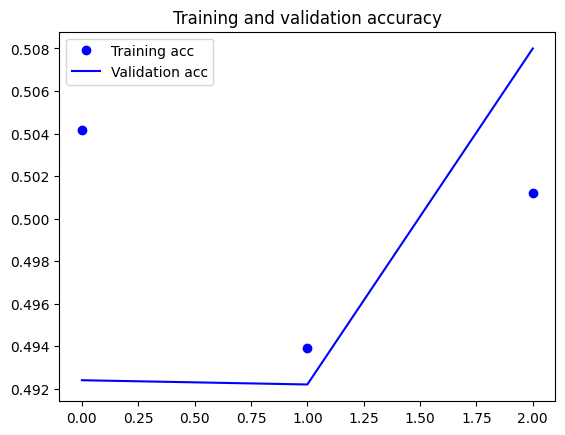

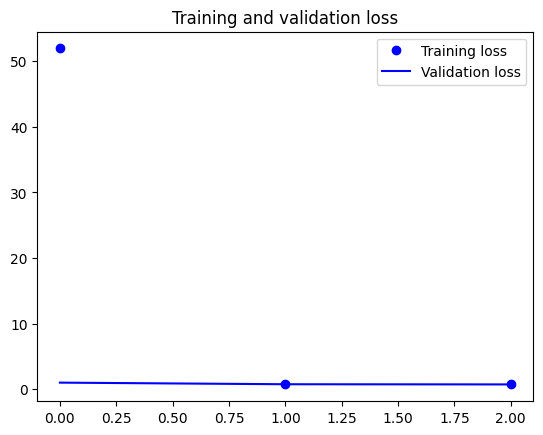

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
print(x_train[0].shape)

# 次元を一つ追加する。
print(x_train[0][np.newaxis].shape)
print(x_train[0][np.newaxis])

(500,)
(1, 500)
[[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0  

In [ ]:
import numpy as np

pred0 = model.predict(x_test[0][np.newaxis])

print('予測値: ', pred0)
print('正解: ', y_test[0])

1/1 [==============================] - 0s 42ms/step
予測値:  [[0.00685999]]
正解:  0


#### 2-5 確認例題
x_test[1]、x_test[2]を予測してみましょう。正解とも比較してみましょう。

#### 2-6 確認例題
* epoch数を10に増やして実行してみましょう。分類精度や損失グラフも描画しましょう。(実行時間がかかるようならepoch数を少なくしても良いです。)
* x_test[0]、x_test[1]、x_test[2]を予測し、epoch数が少ない場合と比較して、結果に変化があったかを確認してみましょう。

### 単語の埋め込み層の利用
単語の埋め込み層 (Embedding層) を組み込んだニューラルネットワークを構築し、同様に、IMDbデータセットの二値分類を行います。

In [ ]:
max_words = 10000  # 単語数
max_len = 500  # 入力する単語列の長さ
embedding_dim = 128 # 単語埋め込み層の次元

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Embedding(max_words, embedding_dim, input_length=max_len))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(32, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 500, 128)          1280000   
                                                                 
 flatten_1 (Flatten)         (None, 64000)             0         
                                                                 
 dense_2 (Dense)             (None, 32)                2048032   
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 3328065 (12.70 MB)
Trainable params: 3328065 (12.70 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=3,
                    batch_size=32,
                    validation_split=0.2)

Epoch 1/3
625/625 [==============================] - 32s 42ms/step - loss: 0.5600 - acc: 0.6629 - val_loss: 0.3539 - val_acc: 0.8474
Epoch 2/3
625/625 [==============================] - 11s 18ms/step - loss: 0.2027 - acc: 0.9190 - val_loss: 0.3402 - val_acc: 0.8606
Epoch 3/3
625/625 [==============================] - 8s 12ms/step - loss: 0.0311 - acc: 0.9907 - val_loss: 0.4767 - val_acc: 0.8478


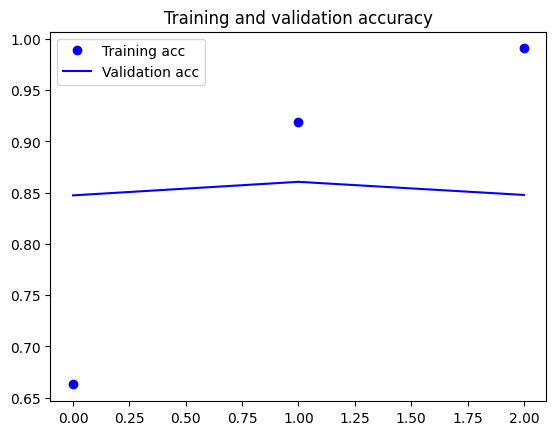

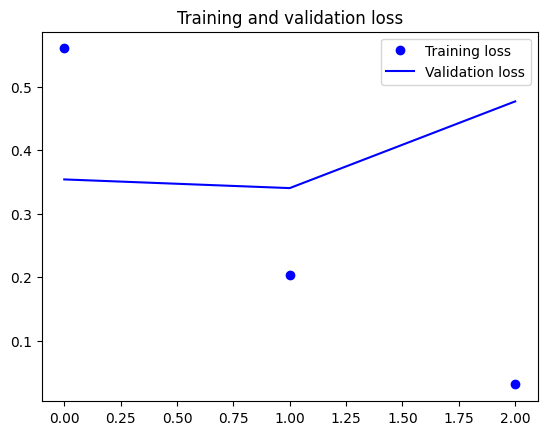

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

#### 2-7 確認例題
x_test[0]、x_test[1]、x_test[2]を予測してみましょう。正解とも比較してみましょう。

#### 2-8 確認例題
* epoch数を10に増やして実行してみましょう。分類精度や損失グラフも描画しましょう。(実行時間がかかるようならepoch数を少なくしても良いです。)
* x_test[0]、x_test[1]、x_test[2]を予測し、epoch数が少ない場合と比較して、結果に変化があったかを確認してみましょう。

### 1次元CNN

文書分類は、RNNやLSTMも多く用いられますが（次週に説明します）、1次元のCNNでも実装することができます。1次元のCNNは、考え方は画像の分類タスクなどで多く利用される2次元CNNと同様です。

<br>

<img src='https://drive.google.com/uc?export=view&id=1Cp-fI5Ic9RbaoPku-WX0go0XcpTtWEyb' width='50%'>

In [ ]:
model_1Dcnn = tf.keras.models.Sequential()
model_1Dcnn.add(tf.keras.layers.Embedding(max_words, embedding_dim, input_length=max_len))
model_1Dcnn.add(tf.keras.layers.Conv1D(32, 7, activation='relu'))
model_1Dcnn.add(tf.keras.layers.MaxPooling1D(5))
model_1Dcnn.add(tf.keras.layers.Conv1D(32, 7, activation='relu'))
model_1Dcnn.add(tf.keras.layers.GlobalMaxPooling1D())
model_1Dcnn.add(tf.keras.layers.Dense(1))

model_1Dcnn.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 500, 128)          1280000   
                                                                 
 conv1d_2 (Conv1D)           (None, 494, 32)           28704     
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 98, 32)            0         
 g1D)                                                            
                                                                 
 conv1d_3 (Conv1D)           (None, 92, 32)            7200      
                                                                 
 global_max_pooling1d_1 (Gl  (None, 32)                0         
 obalMaxPooling1D)                                               
                                                                 
 dense_13 (Dense)            (None, 1)                

In [ ]:
model_1Dcnn.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=1e-4),
              loss='binary_crossentropy',
              metrics=['acc'])
history = model_1Dcnn.fit(x_train, y_train,
                    epochs=5,
                    batch_size=128,
                    validation_split=0.2)

Epoch 1/5
157/157 [==============================] - 13s 75ms/step - loss: 7.7364 - acc: 0.4985 - val_loss: 7.6168 - val_acc: 0.5062
Epoch 2/5
157/157 [==============================] - 10s 64ms/step - loss: 7.7364 - acc: 0.4985 - val_loss: 7.6168 - val_acc: 0.5062
Epoch 3/5
157/157 [==============================] - 8s 51ms/step - loss: 7.7364 - acc: 0.4985 - val_loss: 7.6168 - val_acc: 0.5062
Epoch 4/5
157/157 [==============================] - 5s 35ms/step - loss: 7.7364 - acc: 0.4985 - val_loss: 7.6168 - val_acc: 0.5062
Epoch 5/5
157/157 [==============================] - 5s 30ms/step - loss: 7.7364 - acc: 0.4985 - val_loss: 7.6168 - val_acc: 0.5062


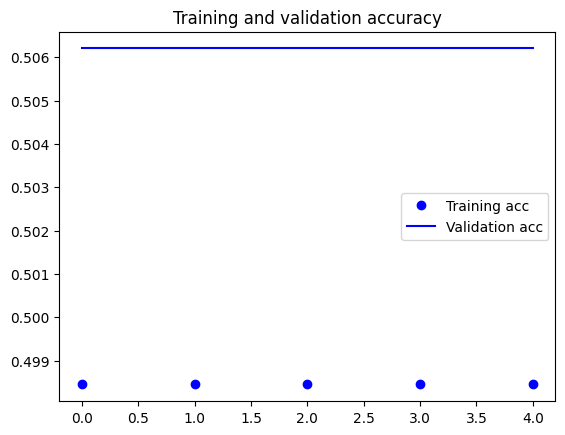

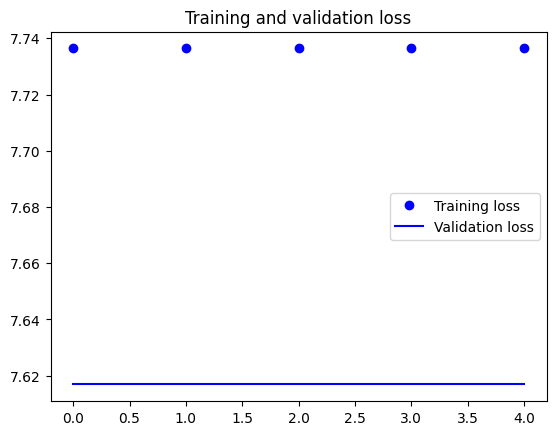

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
scores = model_1Dcnn.evaluate(x_test, y_test, verbose=0)
print('Test accuracy:', scores[1])

Test accuracy: 0.5


#### 2-9 確認例題
* 1次元CNNの例題で、epoch数を10に増やして実行してみましょう。分類精度や損失グラフも描画しましょう。(実行時間がかかるようならepoch数を少なくしても良いです。)
* epoch数が少ない場合と比較して、分類精度に変化があったかを確認してみましょう。

### Reutersニュースのデータセット
KerasにはReutersニュースのデータセットも付属しています。このデータセットを用いてニュースのトピック分類をしてみましょう。

https://keras.io/ja/datasets/#_5

In [ ]:
max_words = 1000

# 頻出上位1000位までの単語を対象に読み込む。
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.reuters.load_data(num_words=max_words)

print(len(x_train), 'train 列')
print(len(x_test), 'test 列')
num_classes = np.max(y_train) + 1
print(num_classes, 'クラス (class)')  # クラス数 = 分類数

2110848/2110848 [==============================] - 1s 1us/step
8982 train 列
2246 test 列
46 クラス (class)


In [ ]:
word_index =  tf.keras.datasets.reuters.get_word_index()
print(word_index)

550378/550378 [==============================] - 1s 1us/step
{'mdbl': 10996, 'fawc': 16260, 'degussa': 12089, 'woods': 8803, 'hanging': 13796, 'localized': 20672, 'sation': 20673, 'chanthaburi': 20675, 'refunding': 10997, 'hermann': 8804, 'passsengers': 20676, 'stipulate': 20677, 'heublein': 8352, 'screaming': 20713, 'tcby': 16261, 'four': 185, 'grains': 1642, 'broiler': 20680, 'wooden': 12090, 'wednesday': 1220, 'highveld': 13797, 'duffour': 7593, '0053': 20681, 'elections': 3914, '270': 2563, '271': 3551, '272': 5113, '273': 3552, '274': 3400, 'rudman': 7975, '276': 3401, '277': 3478, '278': 3632, '279': 4309, 'dormancy': 9381, 'errors': 7247, 'deferred': 3086, 'sptnd': 20683, 'cooking': 8805, 'stratabit': 20684, 'designing': 16262, 'metalurgicos': 20685, 'databank': 13798, '300er': 20686, 'shocks': 20687, 'nawg': 7972, 'tnta': 20688, 'perforations': 20689, 'affiliates': 2891, '27p': 20690, 'ching': 16263, 'china': 595, 'wagyu': 16264, 'affiliated': 3189, 'chino': 16265, 'chinh': 162

In [ ]:
print(x_train[0])
print(y_train[0])

[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 2, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 2, 2, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 2, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]
3


#### 入力データのone-hotベクトルへの加工
* 上記のIMDbデータの例題では、入力層に全結合層 (Dense層) と単語埋め込み層を使いましたが、この例題では全結合層を使います。
* テキストデータ (x_train、x_test) は、sequences_to_matrix() 関数を適用して、0と1だけの表現 (2値化表現) の1000次元のベクトルに加工します。
* ラベルデータ (y_train、y_test) も、to_categorica()関数を適用して、46次元のone-hotベクトルに加工します。

In [ ]:
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=max_words)
x_train = tokenizer.sequences_to_matrix(x_train, mode='binary')
x_test = tokenizer.sequences_to_matrix(x_test, mode='binary')
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

x_train shape: (8982, 1000)
x_test shape: (2246, 1000)
y_train shape: (8982, 46)
y_test shape: (2246, 46)


In [ ]:
print(x_train[0])
print(y_train[0])

[0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 0. 1. 0. 0. 1. 0.
 0. 1. 1. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0.
 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(512, input_shape=(max_words,)))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(num_classes))
model.add(tf.keras.layers.Activation('softmax'))
model.summary()  # display model summary

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 512)               512512    
                                                                 
 activation (Activation)     (None, 512)               0         
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_15 (Dense)            (None, 46)                23598     
                                                                 
 activation_1 (Activation)   (None, 46)                0         
                                                                 
Total params: 536110 (2.05 MB)
Trainable params: 536110 (2.05 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['acc'])

history = model.fit(x_train, y_train,
                    batch_size=32,
                    epochs=3,
                    verbose=1,
                    validation_split=0.1)

Epoch 1/3
253/253 [==============================] - 3s 6ms/step - loss: 0.5773 - acc: 0.8617 - val_loss: 0.8749 - val_acc: 0.7942
Epoch 2/3
253/253 [==============================] - 1s 4ms/step - loss: 0.4097 - acc: 0.8989 - val_loss: 0.8727 - val_acc: 0.8053
Epoch 3/3
253/253 [==============================] - 1s 4ms/step - loss: 0.3251 - acc: 0.9186 - val_loss: 0.9188 - val_acc: 0.8187


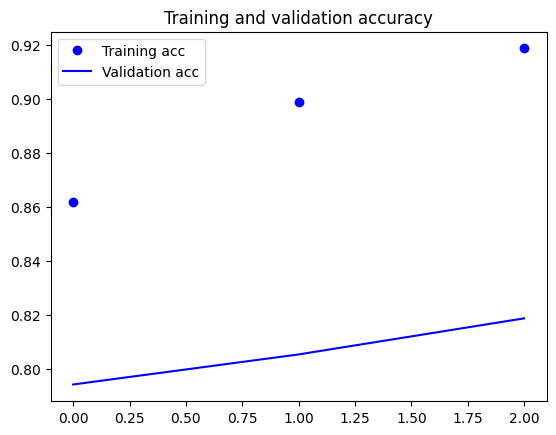

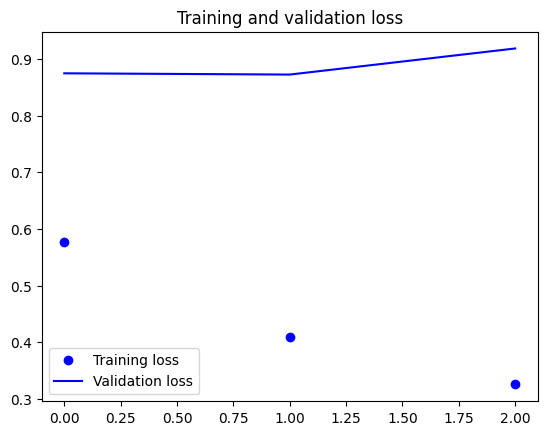

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
pred = model.predict(x_test[0][np.newaxis])
print(np.max(pred))
print('予測: ', np.argmax(pred))

print('正解: ', np.argmax(y_test[0]))

1/1 [==============================] - 0s 19ms/step
0.909633
予測:  3
正解:  3


#### 2-10 確認例題

x_test[1]とx_test[2]を予測し、正解と比較してみましょう。

In [ ]:
scores = model.evaluate(x_test, y_test, verbose=0)
print('Test accuracy:', scores[1])

Test accuracy: 0.7951914668083191


#### 2-11 確認例題
* epoch数を10として実行してみましょう。分類精度や損失グラフも描画しましょう。(実行時間がかかるようならepoch数を少なくしても良いです。)
* epoch数が少ない場合と比較して、分類精度に変化があったかを確認してみましょう。

### 付録

#### 例題 word2vecの利用
Reutersニュースのトピック分類の例題について、IMDbデータセットの例題と同様に、単語埋め込み層 (Embedding層) を使用しするようにニューラルネットワークを修正してみましょう。下記にコード例を示します。この例では、単語の埋め込み層を追加し、さらにWord2Vecモデルの重みを設定しています。

上記と同様に、Text8コーパスを用いて学習し、Word2Vecのモデルを作成します。

In [ ]:
!wget http://mattmahoney.net/dc/text8.zip
!unzip text8.zip

In [ ]:
import logging
from gensim.models.word2vec import Word2Vec, Text8Corpus

logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

sentences = Text8Corpus('text8')
w2vmodel = Word2Vec(sentences, size=100)

w2vmodel.save('model.bin')

In [ ]:
w2vmodel = Word2Vec.load('model.bin')

同様に、Reutersニュースのデータセットを読み込みます。

In [ ]:
#from tensorflow.keras.datasets import reuters
import numpy as np
#import keras
#from keras.models import Sequential
#from keras.layers import Dense, Dropout, Activation
#from keras.preprocessing.text import Tokenizer

max_words = 1000

print('Loading data...')
# 頻出上位1000位までの単語を対象に読み込む。
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.reuters.load_data(num_words=max_words)

print(len(x_train), 'train 列')
print(len(x_test), 'test 列')
num_classes = np.max(y_train) + 1
print(num_classes, 'クラス (class)')  # クラス数 = 分類数

In [ ]:
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=max_words)
x_train = tokenizer.sequences_to_matrix(x_train, mode='binary')
x_test = tokenizer.sequences_to_matrix(x_test, mode='binary')
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

Reutersニュースの単語情報を抽出、確認します。

In [ ]:
word_index = tf.keras.datasets.reuters.get_word_index()
print(word_index)
voc = [word for word in word_index.keys()]
print(voc)
print(len(voc))

深層学習モデルに埋め込むための単語分散行列を、先ほど作成したWord2Vecモデルから作成します。

In [ ]:
embeddings_index = {key: w2vmodel[key] for key in w2vmodel.wv.vocab}

In [ ]:
num_tokens = len(voc) + 2
embedding_dim = 100
hits = 0
misses = 0

# Prepare embedding matrix
embedding_matrix = np.zeros((num_tokens, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # Words not found in embedding index will be all-zeros.
        # This includes the representation for "padding" and "OOV"
        embedding_matrix[i] = embedding_vector
        hits += 1
    else:
        misses += 1
print("Converted %d words (%d misses)" % (hits, misses))

学習モデルを構築します。データの形状の整合性をとるために、GlobalMaxPooling1D()層を追加しています。

In [ ]:
model_w2v = tf.keras.models.Sequential()
model_w2v.add(tf.keras.layers.Embedding(
    num_tokens,
    embedding_dim,
    embeddings_initializer=tf.keras.initializers.Constant(embedding_matrix),
    trainable=False))
model_w2v.add(Dense(512))
model_w2v.add(tf.keras.layers.Activation('relu'))
model_w2v.add(tf.keras.layers.Dropout(0.5))
model_w2v.add(tf.keras.layers.GlobalMaxPooling1D())
model_w2v.add(tf.keras.layers.Dense(num_classes))
model_w2v.add(tf.keras.layers.Activation('softmax'))
model_w2v.summary()  # display model summary

model_w2v.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['acc'])

history = model_w2v.fit(x_train, y_train,
                    batch_size=32,
                    epochs=10,
                    verbose=1,
                    validation_split=0.2)


import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
predictions = model_w2v.predict(x_test)

# class_names[np.argmax(predictions[0])]
print("予測値: ", np.argmax(predictions[0]))
print("正解: ",  y_test[0])

1次元CNNを用いた学習モデルは下記のようになります。学習のさせ方などは、上記のモデルと同様です。

In [ ]:
#from keras.models import Sequential
#from keras import layers
#from keras.optimizers import RMSprop

embedding_dim=100
model_1Dcnn = Sequential()
model_1Dcnn.add(Embedding(
    num_tokens,
    embedding_dim,
    embeddings_initializer=tf.keras.initializers.Constant(embedding_matrix),
    trainable=False))
model_1Dcnn.add(tf.keras.layers.Conv1D(32, 7, activation='relu'))
model_1Dcnn.add(tf.keras.layers.MaxPooling1D(5))
model_1Dcnn.add(tf.keras.layers.Conv1D(32, 7, activation='relu'))
model_1Dcnn.add(tf.keras.layers.GlobalMaxPooling1D())
model_1Dcnn.add(tf.keras.layers.Dense(num_classes))
model_1Dcnn.add(tf.keras.layers.Activation('softmax'))

model_1Dcnn.summary()

#model_1Dcnn.compile(optimizer=RMSprop(lr=1e-4),
#              loss='binary_crossentropy',
#              metrics=['acc'])
#history = model_1Dcnn.fit(x_train, y_train,
#                    epochs=10,
#                    batch_size=128,
#                    validation_split=0.2)

### 参考文献
* https://www.kaggle.com/shivamb/beginners-guide-to-text-generation-using-lstms
* Keras公式Webサイト, https://keras.io/examples/